In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Salary_dataset (1).csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
X = data['YearsExperience']
y = data['Salary']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.slope = 0
        self.intercept = 0

    def fit(self, X, y):
        """Train the model using gradient descent."""
        n = len(X)

        for _ in range(self.iterations):
            y_pred = [self.slope * x + self.intercept for x in X]

            # Compute gradients
            d_slope = (-2 / n) * sum(x * (y_i - y_pred_i) for x, y_i, y_pred_i in zip(X, y, y_pred))
            d_intercept = (-2 / n) * sum(y_i - y_pred_i for y_i, y_pred_i in zip(y, y_pred))

            # Update parameters
            self.slope -= self.learning_rate * d_slope
            self.intercept -= self.learning_rate * d_intercept

    def predict(self, X):
        """Make predictions based on trained model."""
        return [self.slope * x + self.intercept for x in X]

    def evaluate(self, X, y):
        """Calculate Mean Squared Error (MSE)."""
        predictions = self.predict(X)
        n = len(y)
        mse = sum((y_i - y_pred) ** 2 for y_i, y_pred in zip(y, predictions)) / n
        return mse

# Example usage
if __name__ == "__main__":
    model = SimpleLinearRegression(learning_rate=0.01, iterations=1000)
    model.fit(X_train, y_train)

    print("Slope:", model.slope)
    print("Intercept:", model.intercept)

Slope: 9410.783201324097
Intercept: 24291.062460346602


In [6]:
predictions = model.predict(X_test)
pd.DataFrame({'y_test': y_test, 'ypred': predictions})

,y_test,ypred
27,112636.0,115575.659513
15,67939.0,71344.978467
23,113813.0,102400.563031
17,83089.0,75109.291747
8,64446.0,55346.647025
9,57190.0,60052.038625
28,122392.0,122163.207754
24,109432.0,107105.954632


In [7]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 38826758.91718233


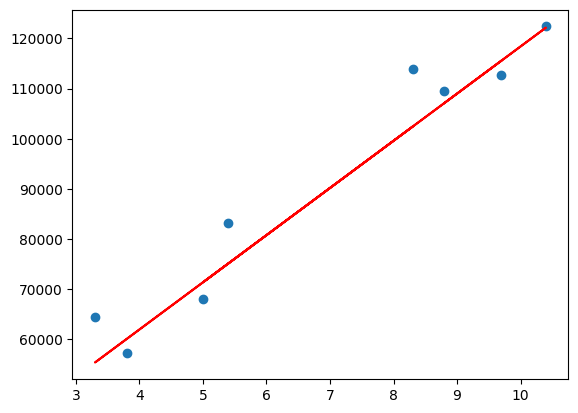

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, 'r-')